In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [113]:
df=pd.read_csv("weight-height.csv")

In [114]:
df.head(6)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156


In [115]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


<Axes: xlabel='Height', ylabel='Count'>

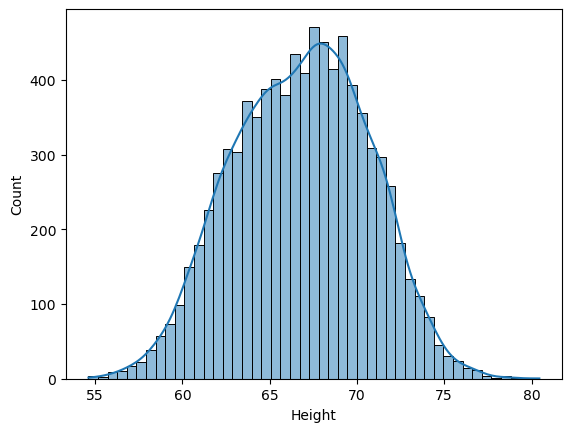

In [116]:
sns.histplot(df["Height"],kde=True)

<Axes: xlabel='Weight', ylabel='Count'>

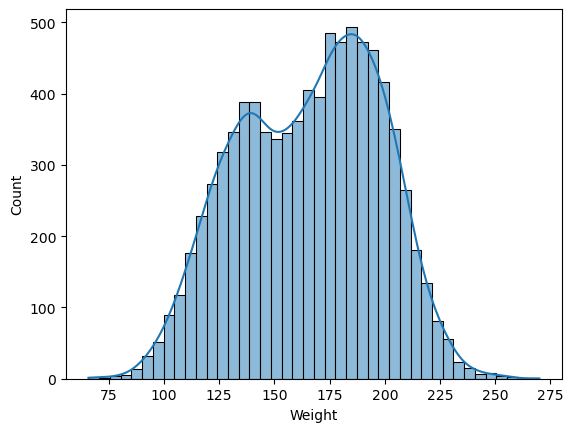

In [117]:
sns.histplot(df["Weight"],kde=True)

In [118]:
df.Height.mean()

66.80992512908942

In [119]:
df.Weight.mean()

165.6327353266768

In [120]:
df.Height.mode()

0       54.616858
1       54.873728
2       55.148557
3       55.336492
4       55.668202
          ...    
8550    78.462053
8551    78.528210
8552    78.621374
8553    78.998742
8554    80.450000
Name: Height, Length: 8555, dtype: float64

In [121]:
df.Height.std()

3.8514544315772765

In [122]:
df.Height.var()

14.833701238516243

In [123]:
df2=df.copy()
df3=df.copy()
df4=df.copy()

In [124]:
#Z score

In [125]:
df["zscore"]=(df["Height"] - df["Height"].mean()) / df["Height"].std()

In [126]:
df.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587


In [127]:
#standard scaler

In [128]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df["std_scaler"]=std.fit_transform(df[["Height"]])
df.head()

,Gender,Height,Weight,zscore,std_scaler
0,Male,73.847017,241.893563,1.827126,1.827233
1,Male,68.781904,162.310473,0.512009,0.512039
2,Male,74.110105,212.740856,1.895435,1.895545
3,Male,71.730978,220.042470,1.277713,1.277788
4,Male,69.881796,206.349801,0.797587,0.797634


<Axes: xlabel='zscore', ylabel='Count'>

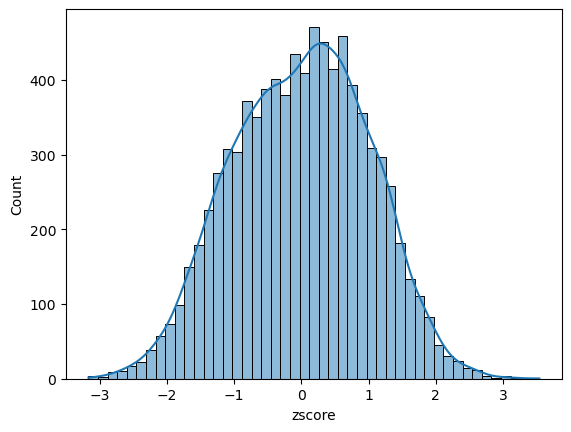

In [129]:
sns.histplot(df["zscore"],kde=True)

In [130]:
df.zscore.max()

3.5415386870680425

In [131]:
df.zscore.min()

-3.165834495955863

In [132]:
df.zscore.min()+1

-2.165834495955863

In [133]:
df.zscore.std()

0.9999999999999981

In [134]:
#REmove outlaier

In [135]:
max_z=df.zscore.max()

In [136]:
min_z=df.zscore.min()

In [137]:
max_z

3.5415386870680425

In [138]:
min_z

-3.165834495955863

In [139]:
df[(df["zscore"]>2)]

,Gender,Height,Weight,zscore,std_scaler
23,Male,75.205974,228.761781,2.179968,2.180096
190,Male,76.709835,235.035419,2.570434,2.570584
197,Male,75.944460,231.924748,2.371711,2.371849
202,Male,75.140821,224.124271,2.163052,2.163178
215,Male,74.795375,232.635403,2.073360,2.073481
...,...,...,...,...,...
4772,Male,74.677471,218.845026,2.042747,2.042866
4807,Male,74.529455,225.540079,2.004315,2.004433
4825,Male,74.975231,214.495489,2.120058,2.120182
4843,Male,74.650540,213.320520,2.035754,2.035873


In [140]:
df[(df["zscore"]<-2)]

,Gender,Height,Weight,zscore,std_scaler
4794,Male,58.406905,121.338323,-2.181778,-2.181906
5000,Female,58.910732,102.088326,-2.050964,-2.051084
5013,Female,58.895886,101.682613,-2.054818,-2.054938
5014,Female,58.438249,98.192621,-2.173640,-2.173767
5026,Female,56.547975,84.872124,-2.664435,-2.664591
...,...,...,...,...,...
8437,Female,58.757371,111.657340,-2.090783,-2.090905
8448,Female,58.996287,107.839015,-2.028750,-2.028869
8455,Female,58.187141,104.472382,-2.238838,-2.238969
8493,Female,58.892474,104.423462,-2.055704,-2.055824


In [141]:
After_remove_outlayers=df[(df["zscore"]<3) &(df["zscore"]>-3)]
After_remove_outlayers

,Gender,Height,Weight,zscore,std_scaler
0,Male,73.847017,241.893563,1.827126,1.827233
1,Male,68.781904,162.310473,0.512009,0.512039
2,Male,74.110105,212.740856,1.895435,1.895545
3,Male,71.730978,220.042470,1.277713,1.277788
4,Male,69.881796,206.349801,0.797587,0.797634
...,...,...,...,...,...
8550,Female,60.483946,110.565497,-1.642491,-1.642587
8551,Female,63.423372,129.921671,-0.879292,-0.879344
8552,Female,65.584057,155.942671,-0.318287,-0.318306
8553,Female,67.429971,151.678405,0.160990,0.161000


In [142]:
df.shape

(8555, 5)

In [143]:
#who are the outlayers

In [144]:
df[(df["zscore"] >3)|(df["zscore"]<-3)]

,Gender,Height,Weight,zscore,std_scaler
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746
6624,Female,54.616858,71.393749,-3.165834,-3.166020
7294,Female,54.873728,78.606670,-3.099140,-3.099321
7617,Female,55.148557,88.812412,-3.027783,-3.027960


In [145]:
df.shape

(8555, 5)

In [146]:
df[df["zscore"]>3]

,Gender,Height,Weight,zscore,std_scaler
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746


In [147]:
df[df["zscore"]<-3]

,Gender,Height,Weight,zscore,std_scaler
6624,Female,54.616858,71.393749,-3.165834,-3.166020
7294,Female,54.873728,78.606670,-3.099140,-3.099321
7617,Female,55.148557,88.812412,-3.027783,-3.027960


<Axes: xlabel='Height', ylabel='Count'>

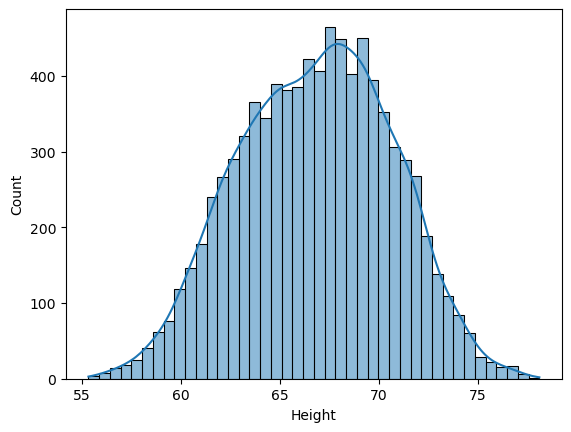

In [148]:
sns.histplot(After_remove_outlayers["Height"],kde=True)

In [149]:
#std

<Axes: xlabel='Height', ylabel='Count'>

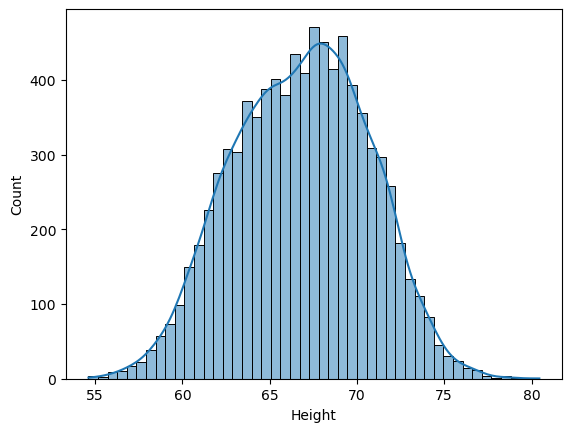

In [150]:
sns.histplot(df["Height"],kde=True)

In [151]:
mean= df2.Height.mean()

In [152]:
std=df2.Height.std()

In [153]:
sigma_3= mean +(3*std)
sigma_3_neg=mean -(3*std)

In [154]:
sigma_3

78.36428842382125

In [155]:
sigma_3_neg

55.25556183435759

In [156]:
df2[(df["Height"]>sigma_3)]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675


In [157]:
df[(df["zscore"]>3)]

,Gender,Height,Weight,zscore,std_scaler
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746


In [158]:
df2[df2["Height"]<sigma_3_neg]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [159]:
df[(df["zscore"] >3) | (df["zscore"]<-3)]

,Gender,Height,Weight,zscore,std_scaler
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746
6624,Female,54.616858,71.393749,-3.165834,-3.166020
7294,Female,54.873728,78.606670,-3.099140,-3.099321
7617,Female,55.148557,88.812412,-3.027783,-3.027960


In [160]:
#who are the outliers

In [161]:
df[(df["zscore"]>3) | (df["zscore"]<-3)]

,Gender,Height,Weight,zscore,std_scaler
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746
6624,Female,54.616858,71.393749,-3.165834,-3.166020
7294,Female,54.873728,78.606670,-3.099140,-3.099321
7617,Female,55.148557,88.812412,-3.027783,-3.027960


In [162]:
after_remove_df2 = df2[(df2['Height'] > sigma_3) | (df2['Height']<sigma_3_neg)] #only outliers
after_remove_df2

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [163]:
df2.shape

(8555, 3)

In [164]:
df2[(df2.Height<sigma_3_neg) | (df2.Height>sigma_3)]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [166]:
df[(df['zscore'] >3) | (df['zscore'] < -3)]

,Gender,Height,Weight,zscore,std_scaler
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746
6624,Female,54.616858,71.393749,-3.165834,-3.166020
7294,Female,54.873728,78.606670,-3.099140,-3.099321
7617,Female,55.148557,88.812412,-3.027783,-3.027960


In [167]:
after_remove_df2 = df2[(df2['Height'] < sigma_3) & (df2['Height']>sigma_3_neg)] # no outliers
after_remove_df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [ ]:
#Boxplot

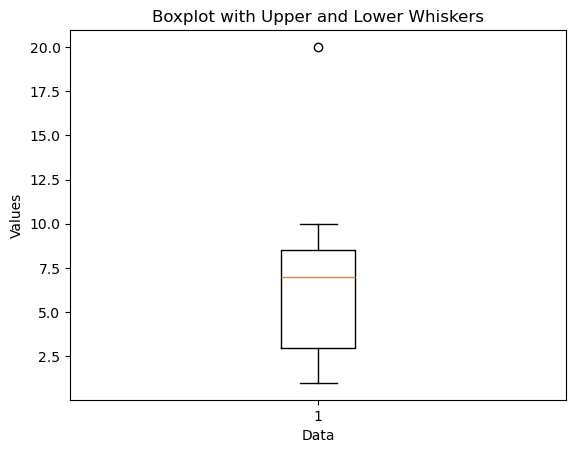

In [168]:
data = np.array([1,2,3,3,5,7,7,8,9,10,20])
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr

outliers = (data < lower_whisker) | (data > upper_whisker)

fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_title('Boxplot with Upper and Lower Whiskers')
ax.set_xlabel('Data')
ax.set_ylabel('Values')
plt.show()

In [169]:
q1

3.0

In [170]:
q3

8.5

In [171]:
np.percentile(data,50)

7.0

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0be313ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0be330500>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0be313d40>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0be330a40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0be330cb0>],
 'means': []}

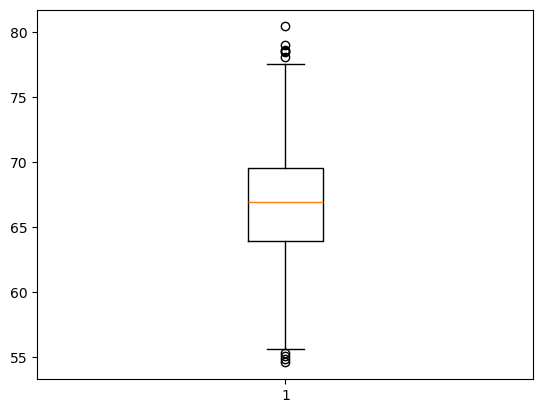

In [172]:
fig, ax = plt.subplots()
ax.boxplot(df['Height'])

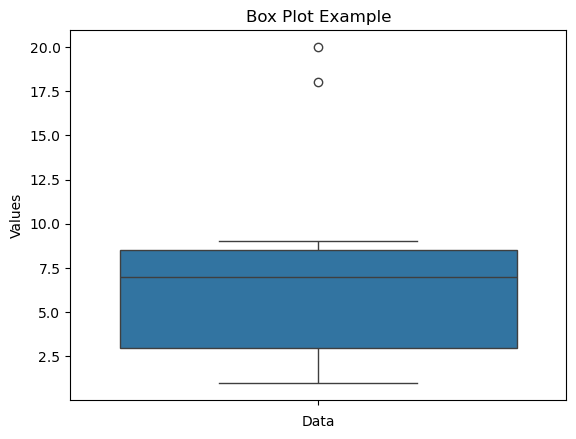

In [173]:
data = [1,2,3,3,5,7,7,8,9,18,20]

sns.boxplot(data=data)

plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Example')

plt.show()

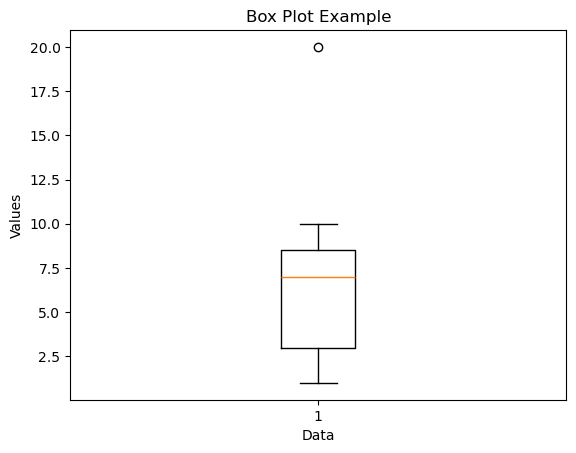

In [174]:
data = [1,2,3,3,5,7,7,8,9,10,20]

fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_xlabel('Data')
ax.set_ylabel('Values')
ax.set_title('Box Plot Example')
plt.show()